In [1]:
import numpy as np
from sklearn import svm 
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from math import sqrt
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import csv
import glob
import os
import copy           

In [3]:
dataPath = "/Users/ASDERTY/Documents/date IA/"
path = '/Users/ASDERTY/Documents/date IA/train/'
pathTest = '/Users/ASDERTY/Documents/date IA/test/'
testedFile = []
train_images = []
test_images = []
#np.concatenate((test_images[x],[[0,0,0],[0,0,0]]),axis = 0)
train_labels = np.array(pd.read_csv("/Users/ASDERTY/Documents/date IA/"+ "train_labels.csv", header=None))
for root,dirs,files in os.walk(path):
    for x in files:
        train_image = (np.array(pd.read_csv(path + x, header=None)))
        for i in range(train_image.shape[0],159):                                         # using panda format for interpolation
            train_image= np.concatenate((train_image,[train_image[i-1]]),axis = 0)                  #because the files size varies between 
                                                                                            #136-156 and entered interpolated data
        train_image = np.array(train_image)
        train_image = train_image.flatten()
        train_images.append((train_image))
for root,dirs,files in os.walk(pathTest):
    testedFiles = files
    for x in files:
        test_image = (np.array(pd.read_csv(pathTest + x, header=None)))
        for i in range(test_image.shape[0],159):
            test_image= np.concatenate((test_image,[test_image[i-1]]),axis = 0)    #same as above, only that the test files                                 #have a max value of 159 of data
        test_image  = np.array(test_image)
        test_image=  test_image.flatten()
        test_images.append((test_image))

train_images = np.array(train_images)
test_images = np.array(test_images)
print(train_images.shape)
print(test_images.shape)
filesGood = []
for x in testedFiles:
    filesGood.append(x.replace('.csv',''))

(9000, 477)
(5000, 477)


<class 'numpy.float64'>
[-0.226252  3.438672  8.314464 -0.229245  3.433884  8.356362 -0.232836
  3.436876  8.375516 -0.251391  3.429694  8.437167 -0.245406  3.442264
  8.438962 -0.20231   3.432088  8.409634 -0.172981  3.454235  8.346786
 -0.194529  3.462614  8.29531  -0.21069   3.500323  8.32045  -0.181361
  3.518279  8.391677 -0.185551  3.524863  8.495825 -0.220865  3.545214
  8.531139 -0.254982  3.562572  8.546103 -0.233435  3.607463  8.5473
 -0.205901  3.633201  8.453926 -0.174777  3.698443  8.227674 -0.102951
  3.699042  8.136096 -0.022146  3.677494  8.088212  0.018555  3.65834
  8.073847  0.034716  3.655946  8.161834 -0.183156  3.642778  8.025963
 -0.390255  3.618237  8.094197 -0.40462   3.606865  8.341997 -0.430358
  3.511097  8.652645 -0.465074  3.524265  9.159617 -0.624288  3.503914
  9.510367 -0.663792  3.59669   9.764751 -0.534506  3.693655  9.758167
 -0.36751   3.725378  9.412804 -0.29748   3.722984  8.884284 -0.309451
  3.663129  8.396465 -0.305261  3.562572  8.180987 -0.35

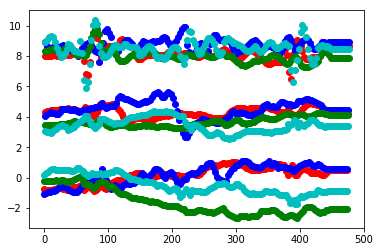

In [4]:
print(type(train_images[0][0]))
print(train_images[2])
plt.plot(train_images[0],'ro')
plt.plot(train_images[1],'bo')
plt.plot(train_images[2],'go')         #checking the data and plot it to see a pattern on the train_data
plt.plot(train_images[3],'co')
plt.show()

In [5]:
def normalize_data(test_data,type):
    if type == 'standard':
        scaler = preprocessing.StandardScaler()       #methods of normalization of data
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == 'min_max':
        scaler = preprocessing.MinMaxScaler()
        scaler.fit(test_data)
        scaled_test_data = scaler.transform(test_data)
    elif type == "l1":
        scaled_test_data = test_data/np.expand_dims(np.sum(abs(test_data),axis = 0),axis = 0)
    elif type == "l2":
        scaled_test_data = test_data/np.expand_dims(np.sqrt(np.sum(test_data**2,axis = 0)), axis = 0 )
    return scaled_test_data

[[-0.68896632 -0.31463093 -0.06413251 ...  0.88611318 -0.42981604
   0.61757884]
 [-1.10113347 -0.56945138  0.82999875 ...  0.95397144 -0.21914998
   0.81685942]
 [-0.02949837 -1.0755175   0.2492261  ... -2.18252503 -0.49452481
  -0.13364192]
 ...
 [ 1.24712523 -1.44932189  1.88846692 ...  0.49396206 -0.92510138
  -0.0278432 ]
 [ 0.98304677  0.46770162 -0.95296256 ...  0.21538421 -0.24007093
  -0.33628087]
 [-0.48835322  0.34514291 -0.7244235  ...  1.06540258  0.54518384
  -0.73092346]]


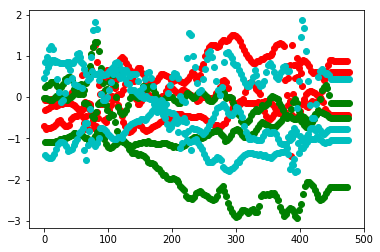

In [6]:
scaled_data = copy.deepcopy(train_images)
scaled_test = copy.deepcopy(test_images)
scaled_data = normalize_data(scaled_data,'standard')           #making a deep copy to have it unique to normalize
scaled_test = normalize_data(scaled_test,'standard')
print(scaled_data)
plt.plot(scaled_data[0],'ro')
plt.plot(scaled_data[2],'go')
plt.plot(scaled_data[3],'co')
plt.show()

In [8]:
def mlp_class(train_data,train_labels,mlp,test_data):
    mlp.fit(train_data,train_labels)
    predict = mlp.predict(test_data)
    return (predict,mlp)

In [11]:

mlp = MLPClassifier(alpha = 20,solver =  'lbfgs',random_state = 1)
predict,mlp = mlp_class(scaled_data[:3000],train_labels[:3000,[1]].flatten(),mlp,scaled_data)
print(predict)
print(metrics.accuracy_score(train_labels[3000:9000,[1]],predict[3000:9000]),'   *************   ')
print(metrics.accuracy_score(train_labels[0:3000,[1]],predict[0:3000]),'   *************   ')
mlp


[ 7 13  6 ...  3 13 18]
0.8768333333333334    *************   
0.9963333333333333    *************   


MLPClassifier(activation='relu', alpha=20, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
predict,mlp = mlp_class(scaled_data[3000:6000],train_labels[3000:6000,[1]].flatten(),mlp,scaled_data)
print(predict)
print(metrics.accuracy_score(train_labels[0:3000,[1]],predict[0:3000]),'   *************   1-3000')
print(metrics.accuracy_score(train_labels[3000:6000,[1]],predict[3000:6000]),'   *************   3000-6000')
print(metrics.accuracy_score(train_labels[6000:9000,[1]],predict[6000:9000]),'   *************6000-9000   ')

mlp

[ 7 13  6 ...  3 13 18]
0.8746666666666667    *************   1-3000
0.9966666666666667    *************   3000-6000
0.874    *************6000-9000   


MLPClassifier(activation='relu', alpha=20, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [13]:
predict,mlp = mlp_class(scaled_data[6000:9000],train_labels[6000:9000,[1]].flatten(),mlp,scaled_data)
print(predict)
print(metrics.accuracy_score(train_labels[0:3000,[1]],predict[0:3000]),'   *************   1-3000')
print(metrics.accuracy_score(train_labels[3000:6000,[1]],predict[3000:6000]),'   *************   3000-6000')
print(metrics.accuracy_score(train_labels[6000:9000,[1]],predict[6000:9000]),'   *************6000-9000   ')
mlp

[ 7 13  6 ...  3  3 18]
0.8813333333333333    *************   1-3000
0.8873333333333333    *************   3000-6000
0.996    *************6000-9000   


MLPClassifier(activation='relu', alpha=20, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
predict_final,mlp = mlp_class(scaled_data,train_labels[:,[1]].flatten(),mlp,scaled_test)

In [15]:
print(predict_final)
print(dataPath)
print(len(predict_final))
with open(dataPath + 'prezic.csv', mode='w', newline='') as sm: #creating a file for the test data 
    writer = csv.writer(sm, delimiter=',')
    writer.writerow(['id', 'class'])
    for i in range(5000):
        writer.writerow([filesGood[i],predict_final[i]])

[ 3 10  5 ... 20  5  1]
/Users/ASDERTY/Documents/date IA/
5000
